In [20]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

import os
from os import path

import pprint
import datetime as dt

from sklearn.preprocessing import StandardScaler
import time
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
ts = TimeSeries(key='AIH485OT2P8QGKIX', output_format = 'pandas')

In [3]:
#https://www.kaggle.com/usfundamentals/us-stocks-fundamentals
df = pd.read_csv('fund_comp.csv', header = 0).set_index('company_id')
df1 = pd.read_csv('fund_by_comp.csv', header = 0).set_index('company_id')

In [4]:
#data from http://rankandfiled.com/#/data/hedgefunds
df2 = pd.read_csv('cik_ticker_map.csv',header=0, delimiter = '|').set_index('CIK')

In [5]:
df2 = pd.read_csv('cik_ticker_map.csv',header=0, delimiter = '|').set_index('CIK')

In [6]:

df_map = df.join(df2, how='inner')
#df2, only keep whats needed
df_map = df_map[['Ticker','Exchange','SIC']]
#df_map

In [7]:
#df2
df_fund = df1.join(df2, how='inner')
#df2, only keep whats needed
df_fund = df_fund[['indicator_id', 'SIC','Ticker','2010','2011','2012','2013','2014','2015','2016']].reset_index()
#df_fund

In [244]:
len(df_fund.groupby('Ticker'))

6613

In [227]:

df_fund.describe()
#get some data for the various years/

,index,SIC,2010,2011,2012,2013,2014,2015,2016
count,1.539110e+06,1.538911e+06,3.227400e+04,7.017710e+05,9.981090e+05,9.862850e+05,9.441180e+05,8.350970e+05,1.587000e+03
mean,9.521808e+05,4.843561e+03,1.175327e+09,2.093479e+09,4.841751e+09,2.173781e+09,8.752147e+08,7.881383e+08,2.773091e+08
std,4.484712e+05,1.961971e+03,6.630701e+10,4.397291e+11,1.863996e+12,6.916106e+11,6.497375e+10,3.223729e+10,1.303021e+09
min,1.750000e+03,1.000000e+02,-1.461600e+10,-4.489080e+11,-5.611160e+11,-3.761210e+12,-1.470798e+12,-2.490000e+11,-4.311000e+09
25%,7.926410e+05,3.510000e+03,5.829290e+05,2.000000e+04,1.800000e+04,1.525000e+04,1.649625e+04,1.733400e+04,2.350000e+04
50%,1.036262e+06,4.931000e+03,2.384800e+07,4.239000e+06,2.433000e+06,2.592500e+06,2.946000e+06,3.425000e+06,1.021700e+07
75%,1.322705e+06,6.282000e+03,2.057848e+08,5.772700e+07,3.592800e+07,3.838200e+07,4.323288e+07,5.068200e+07,1.057585e+08
max,1.590976e+06,9.995000e+03,1.183862e+13,2.179510e+14,1.400000e+15,5.000000e+14,2.999726e+13,1.474921e+13,2.621928e+10


In [235]:
df_fund

,index,indicator_id,SIC,Ticker,2010,2011,2012,2013,2014,2015,2016
0,1750,AccountsPayableCurrent,3720.0,AIR,1.850960e+08,2.014050e+08,1.493000e+08,1.711000e+08,1.423000e+08,1.634000e+08,NaN
1,1750,AccountsReceivableNetCurrent,3720.0,AIR,2.874350e+08,3.020560e+08,2.974000e+08,2.831000e+08,2.290000e+08,2.427000e+08,NaN
2,1750,AccruedLiabilitiesCurrent,3720.0,AIR,1.168390e+08,1.489560e+08,1.533000e+08,1.613000e+08,2.007000e+08,1.536000e+08,NaN
3,1750,AccumulatedDepreciationDepletionAndAmortizatio...,3720.0,AIR,2.350980e+08,2.984360e+08,3.545000e+08,4.243000e+08,3.985000e+08,4.173000e+08,NaN
4,1750,AccumulatedOtherComprehensiveIncomeLossNetOfTax,3720.0,AIR,-1.864500e+07,-5.519000e+07,-4.250000e+07,-2.930000e+07,-4.040000e+07,-4.440000e+07,NaN
5,1750,AdditionalPaidInCapitalCommonStock,3720.0,AIR,4.238050e+08,4.236220e+08,4.316000e+08,4.364000e+08,4.426000e+08,4.513000e+08,NaN
6,1750,AdditionsToNoncurrentAssets,3720.0,AIR,NaN,9.121800e+07,3.760000e+07,NaN,NaN,NaN,NaN
7,1750,AdjustmentsToAdditionalPaidInCapitalTaxEffectF...,3720.0,AIR,2.470000e+05,4.820000e+05,NaN,NaN,NaN,NaN,NaN
8,1750,AmortizationOfDebtDiscountPremium,3720.0,AIR,1.230900e+07,1.317100e+07,9.600000e+06,5.300000e+06,2.700000e+06,NaN,NaN
9,1750,AmortizationOfIntangibleAssets,3720.0,AIR,NaN,NaN,1.370000e+07,1.040000e+07,4.600000e+06,4.400000e+06,NaN


In [236]:
df_fund.loc[df_fund['SIC'] == 6022.0]
#6022 = state and commercial bank

,index,indicator_id,SIC,Ticker,2010,2011,2012,2013,2014,2015,2016
15494,7789,AccretionAmortizationOfDiscountsAndPremiumsInv...,6022.0,ASBC,NaN,-6.567000e+07,-5.510100e+07,-4.496500e+07,-2.814500e+07,-3.980600e+07,NaN
15495,7789,AccruedLiabilitiesFairValueDisclosure,6022.0,ASBC,NaN,1.593100e+07,1.020800e+07,7.994000e+06,9.530000e+06,NaN,NaN
15496,7789,AccumulatedDepreciationDepletionAndAmortizatio...,6022.0,ASBC,NaN,2.580310e+08,2.693750e+08,2.829210e+08,2.754950e+08,2.862240e+08,NaN
15497,7789,AccumulatedOtherComprehensiveIncomeLossNetOfTax,6022.0,ASBC,NaN,6.560200e+07,4.860300e+07,-2.424400e+07,-4.850000e+06,-3.261600e+07,NaN
15498,7789,AdditionalCollateralAggregateFairValue,6022.0,ASBC,NaN,8.500000e+07,7.000000e+07,4.200000e+07,1.100000e+07,9.000000e+06,NaN
15499,7789,AdditionalPaidInCapitalCommonStock,6022.0,ASBC,NaN,1.586401e+09,1.602136e+09,1.617990e+09,1.484933e+09,1.458522e+09,NaN
15500,7789,AdjustmentToAdditionalPaidInCapitalIncomeTaxEf...,6022.0,ASBC,NaN,NaN,NaN,NaN,NaN,1.518000e+06,NaN
15501,7789,AdjustmentsToAdditionalPaidInCapitalSharebased...,6022.0,ASBC,NaN,1.102400e+07,1.575900e+07,1.484000e+07,1.609100e+07,1.820200e+07,NaN
15502,7789,AdjustmentsToAdditionalPaidInCapitalTaxEffectF...,6022.0,ASBC,NaN,-2.345000e+06,-7.850000e+05,2.500000e+04,-1.288000e+06,NaN,NaN
15503,7789,AdvancesFromFederalHomeLoanBanks,6022.0,ASBC,NaN,NaN,NaN,NaN,NaN,1.750225e+09,NaN


In [243]:

len(df_fund.loc[df_fund['Ticker'] == 'ATLS']['indicator_id'].unique())

317

In [238]:
counting = df_fund.groupby('Ticker').count()
counting.sort_values(by='index', ascending=False).head()

,index,indicator_id,SIC,2010,2011,2012,2013,2014,2015,2016
Ticker,,,,,,,,,,
ATLS,1652,1652,1652,0,636,1081,1076,1031,816,0
DUK,1124,1124,1124,0,646,778,692,664,642,0
MET,933,933,933,0,733,505,496,491,489,0
PPL,810,810,810,0,626,592,566,570,452,0
POM,780,780,780,0,556,530,482,472,446,0


In [246]:
df_fund.groupby('Ticker')['indicator_id'].nunique().sort_values(ascending=False)

Ticker
MET           851
WBS           686
MS            675
COF           656
PBCT          638
JCP           593
RF            587
H             584
BANC          580
STI           579
PGN           576
FITB          574
CNBC          574
WFC           569
HIG           569
DUK           562
NWS           557
BPOP          556
USB           555
BAC           553
VLY           552
HBAN          550
WTFC          548
ONB           548
XL            543
PNC           538
FMBI          535
FNB           533
MTB           529
CIT           529
             ... 
CRDI           30
GOFF           30
DOLV           30
MDW            29
LOCN           29
PFOO           28
LVRP           28
BEMG           28
CHATSWORTH     28
AMBE           28
SVEN           27
BCLR           27
HTHH           27
GPLS           26
YEVN           26
MZAV           26
HMUS           25
PPACU          24
SLGI           24
RBM            23
CCKH           23
BABL           21
RTRO           19
FTS            17
BBG

In [239]:
counting = df_fund.groupby('SIC').count()
counting.sort_values(by='index', ascending=False)

,index,indicator_id,Ticker,2010,2011,2012,2013,2014,2015,2016
SIC,,,,,,,,,,
6022.0,91753,91753,91753,0,33621,63969,62794,59794,56738,0
2834.0,65271,65271,65271,771,23786,35988,38660,38011,33765,0
6021.0,59045,59045,59045,0,26288,41122,37671,37818,35643,0
6798.0,53327,53327,53327,106,24643,32012,34944,35198,33547,0
1311.0,49100,49100,49100,16,20903,29958,30194,28833,22031,0
6035.0,48943,48943,48943,0,18498,34534,31676,26568,20476,0
7372.0,41759,41759,41759,2583,19183,26196,26299,23711,19002,0
7389.0,36198,36198,36198,409,16384,23620,21203,20545,17587,0
3674.0,34726,34726,34726,2154,17402,23756,23360,21559,17675,397


In [8]:
grouped = df_fund.groupby('indicator_id').count().sort_values(by= ['SIC'], ascending=False)
#a lot of different indicators

group_ind = grouped.index[:25].tolist()
#just keep the top 50 index for now, use to filter out non-important data
group_ind

['LiabilitiesAndStockholdersEquity',
 'Assets',
 'StockholdersEquity',
 'NetIncomeLoss',
 'CashAndCashEquivalentsAtCarryingValue',
 'RetainedEarningsAccumulatedDeficit',
 'CommonStockSharesAuthorized',
 'CashAndCashEquivalentsPeriodIncreaseDecrease',
 'NetCashProvidedByUsedInOperatingActivities',
 'NetCashProvidedByUsedInFinancingActivities',
 'CommonStockValue',
 'CommonStockSharesIssued',
 'PropertyPlantAndEquipmentNet',
 'NetCashProvidedByUsedInInvestingActivities',
 'CommonStockParOrStatedValuePerShare',
 'IncomeTaxExpenseBenefit',
 'CommonStockSharesOutstanding',
 'AssetsCurrent',
 'LiabilitiesCurrent',
 'ShareBasedCompensation',
 'OperatingIncomeLoss',
 'Liabilities',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'InterestExpense',
 'WeightedAverageNumberOfSharesOutstandingBasic']

In [9]:
top = grouped[:25]


In [10]:
#graph the top 25 

In [11]:
def plot_bar_x():
    # this is for plotting purpose
    label = top.index
    index = np.arange(len(top))
    plt.bar(index, top['SIC'])
    plt.xlabel('Top Features', fontsize=10)
    plt.ylabel('No of Occurance', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=-90)
    plt.title('Top Fundamental Indicators')
    plt.savefig('Top Fundamental Indicators.png')
    plt.show()
    

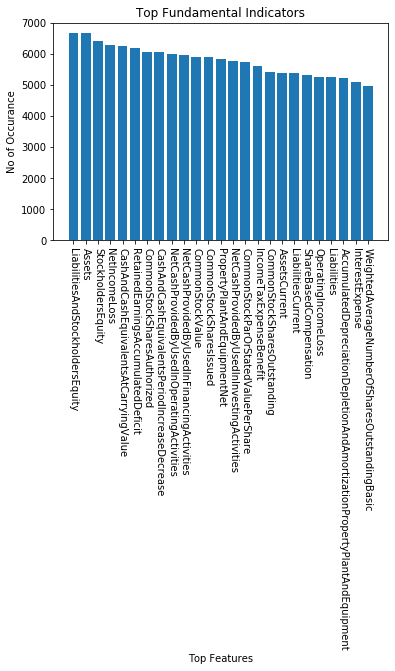

<module 'matplotlib.pyplot' from 'C:\\Users\\huliy\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [151]:
plot_bar_x()
plt

In [13]:
map_tik = df2['Ticker']

In [14]:
#pivot the indicators for one year and try to figure out what are the most important ones
test_=df_fund.loc[df_fund['indicator_id'].isin(group_ind),['index','indicator_id','2015']]
#use only the ones with all values first
test_ = test_.pivot(index='index',columns='indicator_id', values='2015').dropna()
test_=test_.join(map_tik, how = 'inner')

#test_



In [152]:
df_fund

,index,indicator_id,SIC,Ticker,2010,2011,2012,2013,2014,2015,2016
0,1750,AccountsPayableCurrent,3720.0,AIR,1.850960e+08,2.014050e+08,1.493000e+08,1.711000e+08,1.423000e+08,1.634000e+08,NaN
1,1750,AccountsReceivableNetCurrent,3720.0,AIR,2.874350e+08,3.020560e+08,2.974000e+08,2.831000e+08,2.290000e+08,2.427000e+08,NaN
2,1750,AccruedLiabilitiesCurrent,3720.0,AIR,1.168390e+08,1.489560e+08,1.533000e+08,1.613000e+08,2.007000e+08,1.536000e+08,NaN
3,1750,AccumulatedDepreciationDepletionAndAmortizatio...,3720.0,AIR,2.350980e+08,2.984360e+08,3.545000e+08,4.243000e+08,3.985000e+08,4.173000e+08,NaN
4,1750,AccumulatedOtherComprehensiveIncomeLossNetOfTax,3720.0,AIR,-1.864500e+07,-5.519000e+07,-4.250000e+07,-2.930000e+07,-4.040000e+07,-4.440000e+07,NaN
5,1750,AdditionalPaidInCapitalCommonStock,3720.0,AIR,4.238050e+08,4.236220e+08,4.316000e+08,4.364000e+08,4.426000e+08,4.513000e+08,NaN
6,1750,AdditionsToNoncurrentAssets,3720.0,AIR,NaN,9.121800e+07,3.760000e+07,NaN,NaN,NaN,NaN
7,1750,AdjustmentsToAdditionalPaidInCapitalTaxEffectF...,3720.0,AIR,2.470000e+05,4.820000e+05,NaN,NaN,NaN,NaN,NaN
8,1750,AmortizationOfDebtDiscountPremium,3720.0,AIR,1.230900e+07,1.317100e+07,9.600000e+06,5.300000e+06,2.700000e+06,NaN,NaN
9,1750,AmortizationOfIntangibleAssets,3720.0,AIR,NaN,NaN,1.370000e+07,1.040000e+07,4.600000e+06,4.400000e+06,NaN


In [15]:
#take 100 to test it out
test_set = set(test_['Ticker'])
len(test_set)
#test_set = random.sample(test_set, 10)

214

In [21]:
def alpha_stocks(symbol, start_date=(2018, 12, 1), end_date=None):

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    fails = []
    warrants = []
    success = []
    n = 0

    for i in symbol:
        if path.exists('stock_dfs/{}.csv'.format(i)):
            pass
        else: 
        #return
        print (n)
            if '.' in i:
                print (i + " is a warrant")
                warrants.append(i)
                ii = i.split('.')[0]

            try:
                data, meta_data = ts.get_daily_adjusted(symbol = i, outputsize='full')
                if data.empty == False:
                    data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividend', 'Split']
                    data.index.names = ['Date']

                    data.to_csv('stock_dfs/{}.csv'.format(i))
                    success.append(i)
                    print("Downloading data for " + i)

            except:
                print (i + ' is not available')
                fails.append(i)
            n+=1
            time.sleep(15)

    return fails, success
        

IndentationError: expected an indented block (<ipython-input-21-0800b07ef375>, line 16)

In [36]:
amzn = pd.read_csv('stock_dfs/AMZN.csv',header=0, date_parser = True)

In [85]:
data, meta_data = ts.get_daily_adjusted(symbol = 'SCKT', outputsize='full')
#data

In [18]:
#get a list of tickers to download the prices
tickers = test_set
#print ("The number of all stocks is: ")
#print (len(tickers))
fails, success = alpha_stocks(tickers)
#print(apple_data)
#alpha_stocks(symbol = ['SOHU'])
filenames = os.listdir('stock_dfs')
#print (filenames)

GB is not available
DHX is not available
BONE is not available
CPN is not available
SIRO is not available
WSTC is not available
MLEX is not available
IPG is not available
ICE is not available
SBUX is not available
N is not available
LOCK is not available
ELLI is not available
HYTM is not available
FES is not available
OAS is not available
LMT is not available
AOSL is not available
NWMV is not available
ROVI is not available
FF is not available
OME is not available
CRAY is not available
WDPT is not available
HRT is not available
SAFY is not available
RLOC is not available
ANGO is not available
MDSO is not available
STVS is not available
BRCD is not available
LDRH is not available
LOJN is not available
WLP is not available
SPPI is not available
TTS is not available
AHS is not available
FCEL is not available
PANL is not available
MTKN is not available
SYRG is not available
CNC is not available
WMAR is not available
HNR is not available
BCO is not available
DRAD is not available
TTSR is no

In [130]:
fails_, success_ = alpha_stocks(fails_)

GB is not available
BONE is not available
CPN is not available
SIRO is not available
WSTC is not available
MLEX is not available
N is not available
LOCK is not available
ELLI is not available
HYTM is not available
FES is not available
NWMV is not available
ROVI is not available
FF is not available
OME is not available
WDPT is not available
HRT is not available
SAFY is not available
RLOC is not available
STVS is not available
BRCD is not available
LDRH is not available
LOJN is not available
WLP is not available
AHS is not available
MTKN is not available
SYRG is not available
WMAR is not available
HNR is not available
TTSR is not available
ALJ is not available
RAX is not available
AIRM is not available
PLCM is not available
RATE is not available
TIVO is not available
QSII is not available
SPNC is not available
NVDA is not available
JCOF is not available
EXAC is not available
ONNN is not available
DFRH is not available
NLS is not available
WDWT is not available
VGR is not available


In [ ]:
x = 5
stocks = []
#
while i < x:
    fails, success = alpha_stocks(tickers)
    print ("failed to download {} stocks".format(len(fails)))
    tickers = fails
    stocks.append(success)
    i+=1

In [131]:
#get a list of all the actually downloadable stocks
df_s = []
for i in tickers:
    if path.exists('stock_dfs/{}.csv'.format(i)):
        df_s.append(i)
    

In [132]:
len(df_s)

168

In [159]:
#initialize a df to remember returns
df_ret = pd.DataFrame(0, index=df_s, columns=['ret','2015-avg'])
df_ret

,ret,2015-avg
STX,0,0
BREW,0,0
AZZ,0,0
VNX,0,0
DHX,0,0
RRTS,0,0
KNX,0,0
PTSI,0,0
IPG,0,0
ICE,0,0


In [160]:

for index, row in df_ret.iterrows():
    #print(index,row) 
    pd_temp = pd.read_csv('stock_dfs/{}.csv'.format(index),header=0,date_parser = True)

    pd_temp['Date'] = pd_temp['Date'].astype('datetime64[ns]')
    pd_temp['Year'] = pd_temp['Date'].map(lambda x: x.year)
    #print(pd_temp.head())
    avg_2016 = pd_temp[pd_temp['Year'] == 2016]['Adj Close'].mean()
    #print(avg_2016)
    avg_2015 = pd_temp[pd_temp['Year'] == 2015]['Adj Close'].mean()
    #print(avg_2015)
    ret = (avg_2016/avg_2015)-1.0
    
    df_ret.loc[index,'ret'] = ret*1.0
    df_ret.loc[index,'2015-avg'] = avg_2015

    #print(ret)
    #print(row['ret'])


In [161]:
len(df_ret)

168

In [162]:
df_ret.sort_values(by=['ret'])
#VXN is very high, discard
df_ret = df_ret[df_ret['ret']<=1]
df_ret = df_ret.dropna()
#drop the Nas
len(df_ret)

152

In [164]:

len(test_)

215

In [225]:

#reset index to ticker so can join
test_ = test_.set_index('Ticker')


In [165]:
df_final = test_.join(df_ret, how = 'inner')

In [171]:
list(df_final.columns.values)


['AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'Assets',
 'AssetsCurrent',
 'CashAndCashEquivalentsAtCarryingValue',
 'CashAndCashEquivalentsPeriodIncreaseDecrease',
 'CommonStockParOrStatedValuePerShare',
 'CommonStockSharesAuthorized',
 'CommonStockSharesIssued',
 'CommonStockSharesOutstanding',
 'CommonStockValue',
 'IncomeTaxExpenseBenefit',
 'InterestExpense',
 'Liabilities',
 'LiabilitiesAndStockholdersEquity',
 'LiabilitiesCurrent',
 'NetCashProvidedByUsedInFinancingActivities',
 'NetCashProvidedByUsedInInvestingActivities',
 'NetCashProvidedByUsedInOperatingActivities',
 'NetIncomeLoss',
 'OperatingIncomeLoss',
 'PropertyPlantAndEquipmentNet',
 'RetainedEarningsAccumulatedDeficit',
 'ShareBasedCompensation',
 'StockholdersEquity',
 'WeightedAverageNumberOfSharesOutstandingBasic',
 'ret',
 '2015-avg',
 'Leverage',
 'PE']

In [167]:
#add leverage ratio liabilities/equity
df_final['Leverage']=df_final['Liabilities']/(df_final['StockholdersEquity'])

In [169]:
#calculate PE ratio, number of shares * price, market cap, divided by NI
df_final['PE']=df_final['WeightedAverageNumberOfSharesOutstandingBasic']*df_final['2015-avg']/(df_final['NetIncomeLoss'])

In [170]:
df_final['PE']

ABM        21.084568
ADB        91.141496
ADBE       64.147039
ADES       -6.866880
AEY        15.492371
AGCO       15.419895
AKAM       38.004334
ALGT       13.291670
AMKR       27.332020
AMRS      -16.947888
ANGI       36.454219
ANGO      -12.951321
AOSL      -66.144694
ARC         3.511691
ARKR       12.752607
ASNA       -9.065650
ASPN     -214.542507
AVX        19.802972
AYI        35.700448
AZZ        15.890866
BABY       35.345482
BCO      -114.376593
BECN       26.190526
BFAM       37.409903
BID        60.074206
BIIB       22.932475
BLDR      -51.517591
BOOM       -6.359132
BREW       90.076105
CBB        10.529571
            ...     
RUTH       16.689996
SAEX   -13335.089917
SBUX       26.800272
SCKT        7.033073
SFLY    -1921.904174
SHLO       22.709624
SIGA       -1.891195
SLCA      109.700345
SPPI       -8.193662
STRA       14.164584
STX         7.248914
SUPN       49.112783
SWM        11.294546
TALN       28.914611
TAT        -1.489363
TGC        -0.577885
TNC        33

In [187]:
from sklearn.linear_model import LinearRegression

In [192]:
np.array(df_final['Leverage'])

array([  1.13379653,   2.36097729,   0.67483225,  -3.43314116,
         0.26348426,   1.27470669,   0.34190603,   2.86183626,
         2.32321094,  -1.69964255, -74.4451911 ,   0.4334047 ,
         0.31578991,   1.32098717,   0.64867633,   0.92062446,
         1.63837555,   0.10689098,   0.78647059,   1.04351268,
         0.22724271,   5.08367411,   0.75051975,   1.95563133,
         3.05970038,   1.08077629,  18.31725594,   0.54420246,
         0.60297462,  -5.87726358,   1.59571311,   1.13237502,
         0.48057062,   0.50657989,   3.34072343,  -4.17273625,
         2.32498841,   0.27889365,   1.18076923,   0.40946377,
         1.29599532,   1.55268967,   0.34706435,   0.4081978 ,
         0.23798836,   1.41303369,   1.67290225,   1.24852767,
         0.1838796 ,   0.65290204,   1.65759033,   0.93409494,
         1.13022706,   1.17463191,   0.75065758,   2.77240031,
         1.28655216,   0.28774959,   0.94193602,   0.8290884 ,
         0.17579418,   0.31861731,   0.64324458,   0.28

In [193]:
y = np.array(df_final['ret'])
#y
lev = np.array(df_final['Leverage'])
pe = np.array(df_final['PE'])

#x = np.array([df_final['Leverage'],)

In [198]:
df_final

,level_0,index,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,...,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,ShareBasedCompensation,StockholdersEquity,WeightedAverageNumberOfSharesOutstandingBasic,ret,2015-avg,Leverage,PE
0,0,ABM,1.487000e+08,2.149800e+09,9.472000e+08,5.550000e+07,1.880000e+07,0.010,1.000000e+08,5.610576e+07,...,7.360000e+07,7.400000e+07,7.365000e+08,14200000.0,1.007500e+09,5.670000e+07,0.186227,28.373060,1.133797,21.084568
1,1,ADB,3.170000e+08,1.953400e+09,6.536000e+08,5.540000e+07,2.200000e+06,0.010,2.000000e+08,1.071291e+08,...,1.635000e+08,2.091000e+08,-9.672000e+08,16000000.0,5.812000e+08,1.088000e+08,0.246771,71.958221,2.360977,91.141496
2,2,ADBE,9.711950e+08,1.172647e+10,4.821892e+09,8.765600e+08,-2.408400e+08,0.000,9.000000e+08,6.008340e+08,...,9.030950e+08,7.874210e+08,7.253431e+09,335859000.0,7.001580e+09,4.987640e+08,0.202021,80.967817,0.674832,64.147039
3,3,ADES,4.557000e+06,6.077500e+07,2.471500e+07,9.265000e+06,-1.591600e+07,0.001,1.000000e+08,2.194387e+07,...,-4.180000e+07,2.040000e+06,-1.410290e+08,7204000.0,-2.497800e+07,2.177300e+07,-0.382677,9.506023,-3.433141,-6.866880
4,4,AEY,4.584796e+06,5.197306e+07,3.592781e+07,6.110986e+06,8.248890e+05,0.010,3.000000e+07,1.056422e+07,...,2.576210e+06,6.201003e+06,4.714135e+07,239613.0,4.113471e+07,1.005505e+07,-0.221771,2.307897,0.263484,15.492371
5,5,AGCO,1.482800e+09,6.501300e+09,2.898300e+09,4.267000e+08,6.300000e+07,0.010,1.500000e+08,8.381481e+07,...,3.611000e+08,1.347100e+09,3.996000e+09,12200000.0,2.838300e+09,8.700000e+07,0.038071,47.216782,1.274707,15.419895
6,6,AKAM,1.062374e+09,4.187925e+09,1.253188e+09,2.894730e+08,5.082300e+07,0.010,7.000000e+08,1.772122e+08,...,4.661500e+08,7.531800e+08,-1.276861e+09,126677000.0,3.120878e+09,1.783910e+08,-0.194168,68.472183,0.341906,38.004334
7,7,ALGT,3.874510e+08,1.351662e+09,3.952430e+08,8.711200e+07,-2.498000e+06,0.001,1.000000e+08,2.225021e+07,...,3.717020e+08,8.859420e+08,5.736190e+08,10474000.0,3.500050e+08,1.692300e+07,-0.170340,173.086246,2.861836,13.291670
8,8,AMKR,3.493377e+09,4.031300e+09,1.317480e+09,5.231720e+08,7.322600e+07,0.001,5.000000e+08,2.827240e+08,...,1.648390e+08,2.579017e+09,-4.601500e+08,3852000.0,1.207883e+09,2.368500e+08,0.142944,6.555992,2.323211,27.332020
9,9,AMRS,7.282200e+07,1.101980e+08,3.566600e+07,1.199200e+07,-3.005500e+07,0.000,4.000000e+08,2.061303e+08,...,-1.485330e+08,5.979700e+07,-1.037104e+09,9134000.0,-1.580650e+08,1.269616e+08,-0.571280,29.094048,-1.699643,-16.947888


In [212]:
x_vals = df_final.drop('ret', 1)
#x_vals.values
x_vals = x_vals.iloc[:,2:]
x_vals.columns

Index(['AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
       'Assets', 'AssetsCurrent', 'CashAndCashEquivalentsAtCarryingValue',
       'CashAndCashEquivalentsPeriodIncreaseDecrease',
       'CommonStockParOrStatedValuePerShare', 'CommonStockSharesAuthorized',
       'CommonStockSharesIssued', 'CommonStockSharesOutstanding',
       'CommonStockValue', 'IncomeTaxExpenseBenefit', 'InterestExpense',
       'Liabilities', 'LiabilitiesAndStockholdersEquity', 'LiabilitiesCurrent',
       'NetCashProvidedByUsedInFinancingActivities',
       'NetCashProvidedByUsedInInvestingActivities',
       'NetCashProvidedByUsedInOperatingActivities', 'NetIncomeLoss',
       'OperatingIncomeLoss', 'PropertyPlantAndEquipmentNet',
       'RetainedEarningsAccumulatedDeficit', 'ShareBasedCompensation',
       'StockholdersEquity', 'WeightedAverageNumberOfSharesOutstandingBasic',
       '2015-avg', 'Leverage', 'PE'],
      dtype='object')

In [223]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

array = x_vals.values
X = array
Y = np.array(df_final['ret'])

test = SelectKBest(score_func=f_regression, k=10)
fit = test.fit(X, Y)

np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.869e+00 4.265e+00 3.071e+00 5.867e+00 3.470e+00 9.084e-01 1.356e-01
 4.251e+00 3.922e+00 1.101e+00 1.551e+00 1.729e+00 3.814e+00 4.265e+00
 2.816e+00 9.559e-02 2.141e+00 2.777e+00 2.187e+00 2.121e+00 1.115e+00
 3.593e+00 4.328e+00 2.981e+00 4.185e+00 1.504e-01 5.655e-03 1.890e+00]
[[ 2.150e+09  5.550e+07  1.880e+07  5.611e+07  5.611e+07  1.142e+09
   2.150e+09  7.365e+08  1.420e+07  5.670e+07]
 [ 1.953e+09  5.540e+07  2.200e+06  1.071e+08  1.056e+08  1.372e+09
   1.953e+09 -9.672e+08  1.600e+07  1.088e+08]
 [ 1.173e+10  8.766e+08 -2.408e+08  6.008e+08  4.978e+08  4.725e+09
   1.173e+10  7.253e+09  3.359e+08  4.988e+08]
 [ 6.078e+07  9.265e+06 -1.592e+07  2.194e+07  2.181e+07  8.575e+07
   6.078e+07 -1.410e+08  7.204e+06  2.177e+07]
 [ 5.197e+07  6.111e+06  8.249e+05  1.056e+07  1.006e+07  1.084e+07
   5.197e+07  4.714e+07  2.396e+05  1.006e+07]]


In [224]:

names = x_vals.columns.values[test.get_support()]
scores = test.scores_[test.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=
  ['Feat_names','F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending =
  [False, True])
print(ns_df_sorted)

                                      Feat_names  F_Scores
1          CashAndCashEquivalentsAtCarryingValue  5.866735
8                         ShareBasedCompensation  4.327948
6               LiabilitiesAndStockholdersEquity  4.265267
0                                         Assets  4.265209
3                        CommonStockSharesIssued  4.251469
9  WeightedAverageNumberOfSharesOutstandingBasic  4.184585
4                   CommonStockSharesOutstanding  3.921639
5                                    Liabilities  3.814366
7             RetainedEarningsAccumulatedDeficit  3.592933
2   CashAndCashEquivalentsPeriodIncreaseDecrease  3.469755


In [ ]:
#regression analysis
df_d = pd.DataFrame(data.data, columns=data.feature_names)

import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


In [172]:
# Separating out the features
x = df_final.loc[:, df_final.columns != 'ret'].values
# Separating out the target
y = df_final.loc[:,['ret']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x
y

array([[ 0.18622748],
       [ 0.24677069],
       [ 0.20202128],
       [-0.38267685],
       [-0.22177135],
       [ 0.03807067],
       [-0.19416818],
       [-0.17034016],
       [ 0.14294448],
       [-0.57127951],
       [ 0.33899486],
       [-0.09450968],
       [ 0.84687822],
       [-0.46516869],
       [-0.06649611],
       [-0.4220513 ],
       [-0.34161894],
       [ 0.01711712],
       [ 0.29989967],
       [ 0.18307943],
       [-0.09590401],
       [ 0.18492134],
       [ 0.30272492],
       [ 0.14645496],
       [-0.18417281],
       [-0.20530219],
       [-0.04034619],
       [-0.09633074],
       [ 0.18061093],
       [ 0.11409652],
       [ 0.0087243 ],
       [-0.28135528],
       [-0.74795328],
       [ 0.17622202],
       [-0.10968739],
       [-0.36826332],
       [-0.02724007],
       [-0.482953  ],
       [ 0.22324471],
       [ 0.03951872],
       [ 0.04503735],
       [ 0.05517667],
       [ 0.00192121],
       [-0.08078137],
       [-0.32282972],
       [ 0

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'\
                                                                   ,'principal component 3','principal component 4','principal component 5'])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-1.133109,-0.067614,0.126842,-0.087325,-0.386151
1,-0.998163,-0.238104,0.054870,0.043427,-0.328462
2,3.898471,-0.157979,2.539283,-0.631718,0.685159
3,-1.729262,-0.096068,-0.025551,-0.145487,-0.406831
4,-1.738114,-0.069843,-0.123585,-0.082952,-0.314630
5,0.447171,0.264875,-0.088620,-0.033157,-0.524623
6,0.271530,-0.415900,0.685126,-0.176681,-0.221204
7,-0.962359,-0.169888,-0.464487,-0.052550,-0.369755
8,0.577797,-0.627927,-0.172044,0.230557,-0.404116
9,-1.301038,-0.476074,0.298049,0.025225,-0.256938


In [179]:
df_finall = df_final.reset_index()
#df_finall

In [181]:
df_final = df_final.reset_index()
finalDf = pd.concat([principalDf, df_finall[['ret']]], axis = 1)
#finalDf

ValueError: cannot insert level_0, already exists

In [182]:
from sklearn.decomposition.pca import PCA
#explained variance
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

[46.96 57.69 65.35 72.39 77.36]


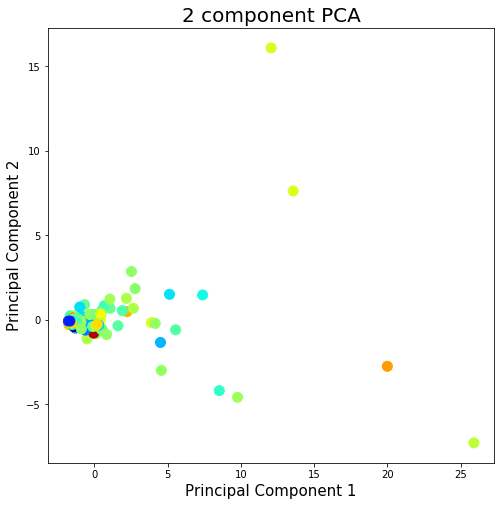

In [185]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
jet=plt.get_cmap('jet')
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s=100, c=finalDf['ret'], cmap=jet)
plt.savefig('pca.png')